# Classical ML vs Quantum ML --- Moons Dataset

##INTRODUCTION

From personalized recommendations to chatbots, Artificial Intelligence relies heavily on Machine Learning (ML), which finds patterns in data to predict future outcomes. However, these ML algorithms require complex mathematical operations, which can slow down the processing times. Quantum computing offers a promising solution: by leveraging unique properties like superposition and entanglement, it can solve such intricate problems exceptionally quickly.

Our objective is to utilize Quantum Neural Networks and other tools to compare and contrast their classification performance against traditional classical systems, such as observing their time and space complexities, accuracies, and practical challenges.

This is an exploratory project, with the main goal being to learn about and experiment with a basic quantum systems.


---

Notebook created by Kimberly McNeil, an undergraduate Computer Science student from Muhlenberg College, conducting summer research with her professor Dr. Youngsun Jang.

## Installations

Before we begin, we need to install and import our packages and libraries.

In [ ]:
!pip install qiskit-machine-learning
!pip install pylatexenc
!pip install pympler

In [ ]:
# General Imports
from sklearn.datasets import make_moons         # Our dataset --- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

from sklearn.preprocessing import MinMaxScaler  # Our Scaler, which scales and translates each feature individually such that it is within the given range zero and one
import pandas as pd                             # Provides the tools needed to effectively manage, process, and analyze structured data
import seaborn as sns                           # Python data visualization library based on matplotlib
import matplotlib.pyplot as plt                 # Plotting
import numpy as np                              # Math operations

import time                                     # Various functions for working with time-related operations

from IPython.display import clear_output                        # Removes any output that has already been generated by that cell
from qiskit_machine_learning.utils import algorithm_globals     # Ensures Reproducibility (Setting the Seed)
algorithm_globals.random_seed = 42                              # Consistent randomness throughout the program

import sys                    # Interacts with the operating system and the Python interpreter itsel
from pympler import asizeof   # Returns a tuple containing the (approximate) size in bytes for each given Python object separately

# Classical ML Imports
from sklearn.model_selection import train_test_split    # Data split using scikit-learn
from sklearn.svm import SVC                             # Support Vector Classifier, which is a type of Support Vector Machine (SVM) specifically designed for classification tasks

# Quantum ML Imports
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap # RealAmplitudes: A type of ansatz (trainable circuit) used in VQCs.
                                                                # ZZFeatureMap: Encodes classical input into quantum states.

from qiskit_machine_learning.optimizers import COBYLA           # COBYLA: global optimizer (gradient-free) - good when gradients are unreliable or unavailable

from qiskit_machine_learning.algorithms.classifiers import VQC  # Library 'NeuralNetworkClassifier' is required to do QNN classification task.
                                                                # VQC is a pre-configured variant model (shortcut classes that simplify QNN + feature map + ansatz + loss + optimizer configuration for beginners)

from qiskit.primitives import StatevectorSampler as Sampler     # Our Sampler. SamplerQNN is the foundational, essential, and lowest-level implementations for building Quantum Neural Networks (QNNs)
                                                                # Despite using a VQC, we are still using the SamplerQNN under the hood, as the VQC will internally build a SamplerQNN

## The Data --- Preprocessing

First, let us prepare our input data from the make_moons dataset. For our convenience, this dataset is available in scikit-learn and can be loaded easily.

In [ ]:
# load the make_moons dataset from sklearn
# the make_moons dataset A simple toy dataset to visualize clustering and classification algorithms, generating two types of "moons" (points) on a 2D plane
features, labels = make_moons(n_samples=100, noise=0.1, random_state=algorithm_globals.random_seed)
print(features.shape, labels.shape)

(100, 2) (100,)


In [ ]:
# we are going to work with features and labels from the dataset.
print('features: ', features)
print('labels: ', labels)

features:  [[ 1.58202308 -0.44581483]
 [ 0.0660451   0.4392075 ]
 [ 0.73663111 -0.39896339]
 [-1.05692838  0.2424558 ]
 [-0.80216162  0.20271838]
 [-0.70641308  0.77076218]
 [ 0.2053884   0.81875305]
 [ 1.37804958 -0.44658032]
 [ 0.8481931   0.67172277]
 [ 0.92202981 -0.08438964]
 [ 0.38972996  0.81785686]
 [-0.33031615  0.9271263 ]
 [ 1.1673298  -0.5978882 ]
 [-0.59659735  0.89753707]
 [ 1.92535861  0.1831877 ]
 [ 1.12958691  0.33602789]
 [ 1.12532895 -0.40571607]
 [ 1.09856769 -0.51879837]
 [ 0.57010693  0.6727978 ]
 [-0.30851921  0.89344338]
 [-0.02646004  0.14891397]
 [ 1.83385428 -0.17380486]
 [-0.01103091  0.86424669]
 [-0.98799936  0.38321942]
 [ 0.52363988 -0.14410208]
 [ 0.46249008  0.91166069]
 [-0.90469417  0.49415615]
 [ 2.01169144  0.16298968]
 [ 0.77181427  0.53088762]
 [ 0.7557984  -0.56943072]
 [ 0.87011866  0.74872708]
 [-1.03596662  0.11946065]
 [ 1.74719141 -0.42447937]
 [-0.18871867  1.17238503]
 [ 2.12342023 -0.06925813]
 [ 0.87279305  0.33197416]
 [ 0.34941974 -0.

In [ ]:
# Normalize the features.
# Apply MinMaxScaler to represent all features on the same scale. In our case, we squeeze all features onto the interval [0, 1].
features = MinMaxScaler().fit_transform(features)
print(features)

[[0.80026568 0.0859039 ]
 [0.36026263 0.58583934]
 [0.55489599 0.11236955]
 [0.03432666 0.47469734]
 [0.1082711  0.45225029]
 [0.13606151 0.77312945]
 [0.40070615 0.80023875]
 [0.74106366 0.08547149]
 [0.58727616 0.71718362]
 [0.6087068  0.29006741]
 [0.45421012 0.79973251]
 [0.24522128 0.86145713]
 [0.67990357 0.        ]
 [0.16793484 0.84474263]
 [0.89991666 0.44121771]
 [0.66894894 0.52755477]
 [0.66771309 0.10855507]
 [0.65994581 0.04467662]
 [0.5065634  0.71779089]
 [0.2515477  0.84243017]
 [0.3334136  0.42185701]
 [0.8733581  0.23955813]
 [0.33789181 0.82593741]
 [0.05433287 0.55421254]
 [0.49307663 0.25633677]
 [0.47532829 0.85272085]
 [0.07851168 0.61687898]
 [0.92497422 0.42980816]
 [0.56510768 0.63762802]
 [0.56045918 0.01607519]
 [0.59363991 0.76068217]
 [0.04041068 0.40521929]
 [0.84820475 0.09795597]
 [0.28631905 1.        ]
 [0.95740279 0.29861496]
 [0.59441614 0.52526488]
 [0.44251033 0.09937492]
 [0.46129911 0.23603594]
 [0.15881169 0.79163675]
 [0.50642641 0.85149558]


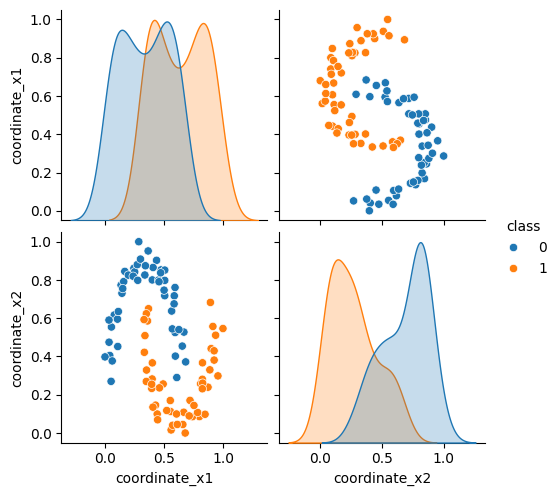

In [ ]:
# Plot the features pair-wise to see if there’s an observable correlation between them.
df = pd.DataFrame(features, columns=['coordinate_x1', 'coordinate_x2'])

df["class"] = pd.Series(labels)
sns.pairplot(df, hue="class", palette="tab10")

From the pairwise plot, we can see that the two classes are in parabolic semi-circles that are near each other. However, while many points from different classes can share either an x1 or x2 coordinate, the semi-circles' paths are separated with no overlaps.

In [ ]:
# Split the data into 80% train and 20% test using our 42 seed
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

## Classical ML Model (Support Vector Classifier)

For our Classical Model, we will be using an SVC, which is a common machine learning model used for classification. It uses our training data (and its labeled classes) to find a decision boundary that maximally separates the two classes. We will also be recording how long training the model takes and how many iterations the model goes through for comparison later.

In [ ]:
# Using a classical Support Vector Classifier from scikit-learn
svc = SVC(max_iter=100)

start = time.time()
_ = svc.fit(train_features, train_labels)  # The _ = suppresses printing the return value
elapsed = time.time() - start

print(f"Training time: {(elapsed)} seconds")

Training time: 0.0022869110107421875 seconds


In [ ]:
# Check the number of iterations for the SVC model
try:
    print(f"Number of iterations for SVC model: {svc.n_iter_} iterations")
except AttributeError:
    print("The SVC model does not have an 'n_iter_' attribute because the solver did not converge.")

Number of iterations for SVC model: [73] iterations


The two plots and accuracies below shows us our model's performace with the training and testing data respectively. The red circles indicate what was incorrectly predicted

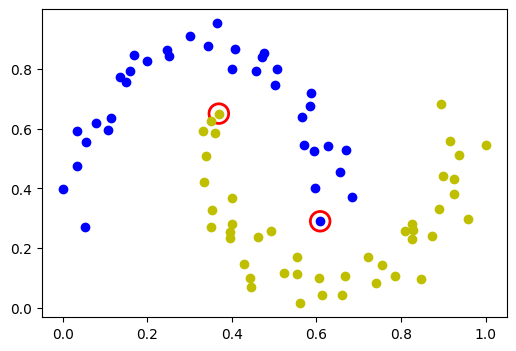

In [ ]:
# Evaluate data points --- TRAINING
# Get predictions from the VQC. vqc.predict returns the predicted class labels (0 or 1)
labels_predict = svc.predict(train_features)

# Reset plot
plt.rcParams["figure.figsize"] = (6, 4)

# Plot results
# red = wrongly classified
for x, y_target, y_p in zip(train_features, train_labels, labels_predict):
    # Check the scalar label directly
    if y_target == 1:
        plt.plot(x[0], x[1], "yo")
    else:
        plt.plot(x[0], x[1], "bo")
    # Compare scalar true label with scalar predicted label
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.show()

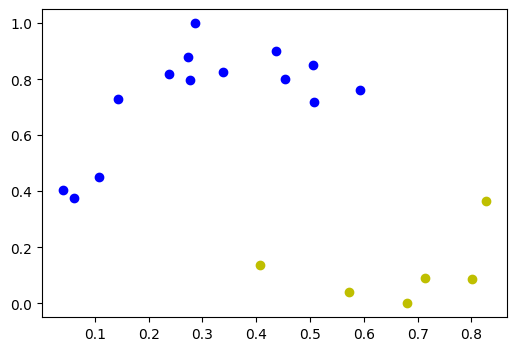

In [ ]:
# Evaluate data points --- TESTING
# Get predictions from the VQC. vqc.predict returns the predicted class labels (0 or 1)
labels_predict = svc.predict(test_features)

# Reset plot
plt.rcParams["figure.figsize"] = (6, 4)

# Plot results
# red = wrongly classified
for x, y_target, y_p in zip(test_features, test_labels, labels_predict):
    # Check the scalar label directly
    if y_target == 1:
        plt.plot(x[0], x[1], "yo")
    else:
        plt.plot(x[0], x[1], "bo")
    # Compare scalar true label with scalar predicted label
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.show()

In [ ]:
# Classical Performance (accuracy)

train_score = svc.score(train_features, train_labels)
test_score = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score:.2f}")
print(f"Classical SVC on the test dataset:     {test_score:.2f}")

Classical SVC on the training dataset: 0.97
Classical SVC on the test dataset:     1.00


The following finds both the shallow and recursive memory usages of the SVC.

Shallow memory is the memory consumed by the object (the SVC) itself, including immediate attributes and internal structurem, but not including the objects it references.

Recursive memory is shallow memory that includes the objects it references, or the total memory consumed by everything recursively. In this case, this would be the SVC object plus all the data structures it holds internally, such as the support vectors, coefficients, and other parameters learned during training.

A fun way to think of the two is to imagine a bag with an interior space much larger than the bag's exterior dimensions (such as a bag of holding, for all of the D&D fans out there). Shallow memory is how much space the bag itself takes up, while recursive memory is how much space the bag takes up along with everything inside if you were to dump it all out onto the floor.

In [ ]:
# Get the shallow memory usage of the SVC model
svc_shallow_memory = sys.getsizeof(svc)
print(f"Shallow memory usage of SVC model: {svc_shallow_memory} bytes")

# Get the recursive memory usage of the SVC model
svc_recursive_memory = asizeof.asizeof(svc)
print(f"Recursive memory usage of SVC model: {svc_recursive_memory} bytes")

Shallow memory usage of SVC model: 56 bytes
Recursive memory usage of SVC model: 6968 bytes


## Quantum ML (QML) Model

The quantum model that we are about to create is a hybrid model. Our VQC (Variational Quantum Classifier) model is trained using Variational Algorithm Design, which utilizes a combination of classical and quantum resources with the goal of taking advantage of each of their strengths. The quantum side handles preprocessing and measuring quantum states while classical takes care of optimization.

The first step is to create our reference state. Initially, all qubits are in the default, classical $|0\rangle$ state, but we can transform it to some desired (non-parametrized) state $|p\rangle$ using a fixed, non-trainable circuit (UR), such as the Hadamard gate that allows for an equal mixture of both states ($|0\rangle$ and $|1\rangle$) for each qubit.

Essentially, this is what transforms our quibits from the classical state into the quantum state.

For our VQC, a *Feature Map* is a parameterized circuit that takes our training data and encodes it into the quantum state. With this map, each parameter value represents a data point from the training dataset (or each feature is represented by a qubit). ZZFeatureMap is a one of these circuits that can pass our data to the feature map.

We first have our initialized $|0\rangle$ qubit states each go through the Hadamard gate to create the superposition. Then, ZZFeatureMap uses Phase (P) gates, or Rz (rotating around the Z-axis on a Bloch Sphere) gates in this case, to encode the input data into the quantum space. Finally, Controlled Not gates (CNOT) create entanglement between the two qubit features.



-------------


Ideally, we *could* use an existing datapoint from our optimized solution or some other educated guess to help us create a better reference state specific to our data that will help our model converge faster. However, we will not be doing this to observe the model's performance from the ground up.







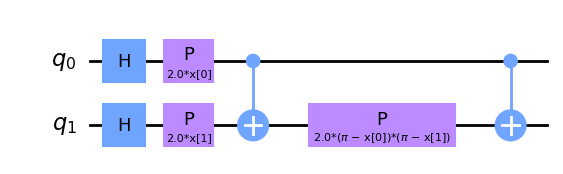

In [ ]:
# ZZFeatureMap
num_features = features.shape[1] # 2 features

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20) # fold 0 indexing

The second step is to create our Ansatz, which acts like the "hidden layers" of a classical neural network, transforming the quantum state using parameterized gates (Ry --- rotation on the y-axis on the Bloch Sphere) gates in a way that allows the classifier to learn the decision boundary between different classes. This is where our model gets to be an actual, trainable model, as the Feature Map is a fixed transformation while the Ansaz contains the trainable parameters that the optimization algorithm will adjust during the training process to minimize the loss function.

---------------------------

One point within both sections of the quantum circuit is the fact that we can have multiple repititions (reps) of our feature map and Ansatz steps. This is to increase the circuit's capacity to encode more complex relationships from the classical data into the quantum state due to the increased number of Ry gates and CNOT gates. Now, although one CNOT is enough to *create* entanglement, CNOT gates between the reps serve to further mix the quantum state based on the correlations established in the first layer/section. These additional mixes allow for our feature map to create specific complex quantum states that can successfully encode the input data.

Deciding how many reps is a task of balancing model expressivity, trainability, and noise resilience. More ZZFeatureMap reps will result in an increase the entanglement and complexity but can more susceptible to noise on current quantum hardware, while more Ansatz reps will make the model more expressive and capable of learning complex functions but are harder to train and are also susceptible to noise. Typically, a larger dataset will need deeper circuits (more reps) and smaller ones (like our make_moons) will be fine with fewer. A table with rep experimentation is provided in the Discussion section at the bottom of this notebook.

It's also important to note that both the ZZFeatureMap and the RealAmplitudes Ansatz typically require at least one repetition. Each repetition in the ZZFeatureMap corresponds to a layer of encoding and entanglement gates, so there would be no encoding our input data into the quantum state without the Feature map having a rep, it would just be an empty circuit. For the Ansatz, while setting reps=0 would create a single layer of Ry gates, it wouldn't create a functional trainable model. The RealAmplitudes Ansatz, by design, uses repetitions to stack layers of parameterized gates.

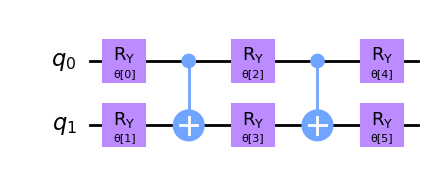

In [ ]:
# Ansatz
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

This is the point where we can see how our VQC model is a hybrid as we begin creating our cost (loss) function and optimization loop. These two elements of Variational Algorithm Design are evaluated on a classical system; however, the value is determined by the results obtained from the quantum circuit.

To start, we are going to use the Constrained Optimization BY Linear Approximations (COBYLA) optimizer---a gradient-free optimization algorithm that aims to minimize the objective function---and Qiskit's SamplerQNN, which uses measurement results for classification by extracting the quantum states' probabilities.


---


Now that we've introduced the Sampler, how does it both get and use these measurements? To those who are more familiar with quantum circuit, you may have noticed that there are no measurement gates anywhere in our circuit. This is because Sampler handles this internally by squaring the absoulute values of the final amplitudes. For instance, let's say that after running through the Ansatz we have a final state of 0.6$|01\rangle$ + 0.8$|10\rangle$. We can square the amplitudes of each to get a probability of predicting $|01\rangle$ as 0.36 and a probability of predicting $|10\rangle$ as 0.64. Because 0.64 > 0.36, the predicted class is measured to be represented by $|10\rangle$. This result is then passed to the optimizer. But what does a class of $|10\rangle$ actually mean in this case? Is it Class 0 or 1? And those are only two basis states, two qubits would result in four!

Well, while we haven't specified a mapping method explicitly, a common approach in Qiskit's SamplerQNN for binary classification with two qubits is to map some basis states to one class and the remaining states to the other, such as
- States with an even number of '1's (like $|00\rangle$ and $|11\rangle$) could be mapped to Class 0.
- States with an odd number of '1's (like $|01\rangle$ and $|10\rangle$) could be mapped to Class 1.

After calculating the probabilities for all basis states, the SamplerQNN sums the probabilities of the basis states mapped to Class 0 and Class 1 separately. The class with the higher total probability is the predicted class for that given input feature vector.

Essentially, the Sampler provides the probabilities of all possible measurement outcomes and the SamplerQNN uses a predefined mapping to convert these probabilities into a decided class.


---


We are using Sampler for this classification because it is designed for simulation with no errors, or noise, as this is for exploratory research. Other options we could have chosen from are Aer Simulator, which is just about the same thing but includes simulated noise, and Quantum Instance (Real Device), which is real quantum hardware that always has natural and unavoidable noise. Noise is anything that interferes with a machine learning model, and simulating or using an Instance will affect the final amplitudes and lead to more incorrect predictions. We already have enough noise for the purposes of this exploration from when we loaded in our dataset, so we can pass on these.

In [ ]:
# local optimizer - COBYLA (gradient-free)
optimizer = COBYLA(maxiter=100)

# SamplerQNN for the VQC
sampler = Sampler()

The following is our callback function that draws a live plot when the .fit() method is called

In [ ]:
# Callback funtion
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

Now we can train our VQC using our Sampler, feature map, Ansatz, optimizer, and callback function on our training data and watch as the callback function creates a live graph of our costs/loss.

You may notice that despite having a max_iter(ation) of 100, our optimizer does not reach this number. This can be due to a few different reasons:
- It finds a solution where the objective function value is below a certain tolerance.
- The change in the objective function value between iterations is very small.
- The change in the optimization parameters (the weights of the ansatz) between iterations is very small.

It's likely that the optimizer converged to a solution before hitting the max_iter of 100. Although our graph seems to flatten however, the optimizer's internal criteria are more precise and can lead to further iterations as it fine-tunes the parameters, which is why the graph seems to be significantly flatter without changing much and *still* iterating. In other words, the visual flatness of the loss graph is a good indicator that the optimizer is approaching convergence, but the optimizer might still be making small adjustments that we can't visually see.

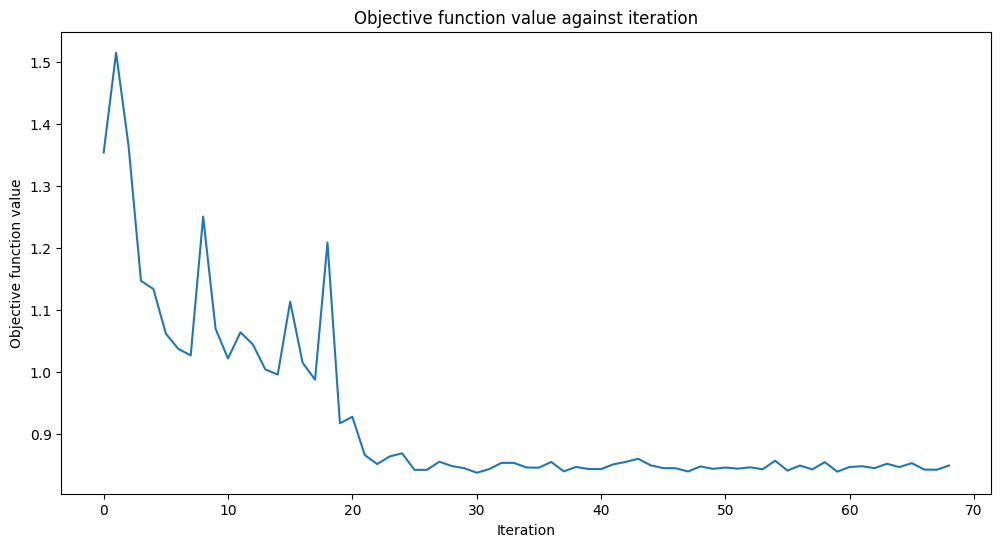

Training time: 53 seconds


In [ ]:
# Training module
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
# The number of iterations for the VQC model
print(f"Number of iterations for VQC model: {len(objective_func_vals)} iterations")

Number of iterations for VQC model: 69 iterations


Just as before, the two plots and accuracies below shows us our model's performace with the training and testing data respectively. The red circles indicate what was incorrectly predicted.

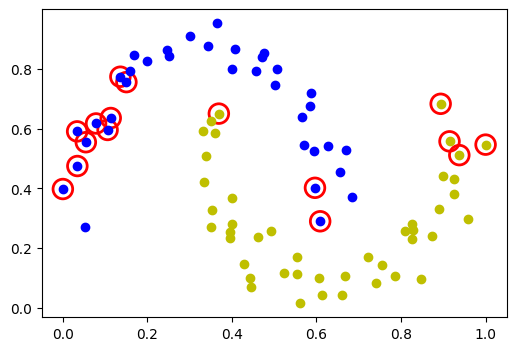

In [ ]:
# Evaluate data points --- TRAINING
# Get predictions from the VQC. vqc.predict returns the predicted class labels (0 or 1)
labels_predict = vqc.predict(train_features)

# Reset plot size
plt.rcParams["figure.figsize"] = (6, 4)

# Plot results
# red = wrongly classified
for x, y_target, y_p in zip(train_features, train_labels, labels_predict):
    # Check the scalar label directly
    if y_target == 1:
        plt.plot(x[0], x[1], "yo")
    else:
        plt.plot(x[0], x[1], "bo")
    # Compare scalar true label with scalar predicted label
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.show()

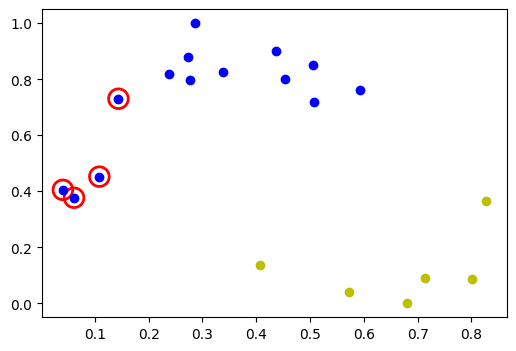

In [ ]:
# Evaluate data points --- TESTING
# Get predictions from the VQC. vqc.predict returns the predicted class labels (0 or 1)
labels_predict = vqc.predict(test_features)

# Reset plot
plt.rcParams["figure.figsize"] = (6, 4)

# Plot results
# red = wrongly classified
for x, y_target, y_p in zip(test_features, test_labels, labels_predict):
    # Check the scalar label directly
    if y_target == 1:
        plt.plot(x[0], x[1], "yo")
    else:
        plt.plot(x[0], x[1], "bo")
    # Compare scalar true label with scalar predicted label
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.show()

In [ ]:
# VQC performance
train_score_q = vqc.score(train_features, train_labels)
test_score_q = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q:.2f}")

Quantum VQC on the training dataset: 0.78
Quantum VQC on the test dataset:     0.80


Our model's memory consumption:

In [ ]:
# Get the shallow memory usage of the SVC model
vqc_shallow_memory = sys.getsizeof(vqc)
print(f"Shallow memory usage of SVC model: {vqc_shallow_memory} bytes")

# Get the recursive memory usage of the SVC model
vqc_recursive_memory = asizeof.asizeof(vqc)
print(f"Recursive memory usage of SVC model: {vqc_recursive_memory} bytes")

Shallow memory usage of SVC model: 56 bytes
Recursive memory usage of SVC model: 49064 bytes


Just to look at the circuit as a whole:

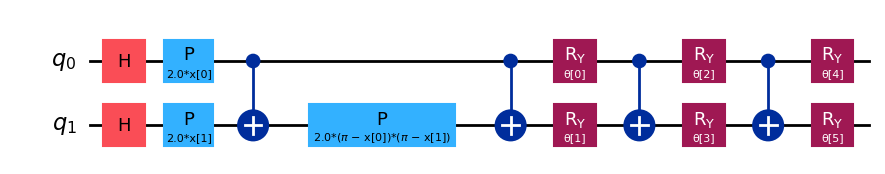

In [ ]:
# Pretty circuit :D
vqc._circuit.decompose().draw('mpl')

## Discussion

### Repetition Table and Notes on Randomness
The following is a table of repetitions for the ZZFeatureMap and Ansatz. All Shallow Memories were the same (56 bytes), so they were excluded from the table.

| ZZFeatureMap Reps | Ansatz Reps | Iterations | Time (Seconds) | Train Accuracy | Test Accuracy | Recursive Memory (Bytes) |
|:-----:|:---:|:-----:|:-----:|:---:|:---:|:-----:|
| 1 | 1 | 39 | 27 | 0.75 | 0.70 | 46736 |
| 2 | 1 | 47 | 33 | 0.81 | 0.80 | 45496 |
| 1 | 2 | 69 | 53 | 0.78 | 0.80 | 49064 |
| 2 | 2 | 67 | 50 | 0.72 | 0.80 | 50040 |
| 3 | 1 | 44 | 35 | 0.64 | 0.50 | 46392 |
| 1 | 3 | 64 | 47 | 0.60 | 0.55 | 53456 |
| 3 | 2 | 90 | 71 | 0.76 | 0.70 | 49824 |
| 2 | 3 | 67 | 54 | 0.71 | 0.80 | 53200 |
| 3 | 3 | 66 | 83 | 0.57 | 0.35 | 53208 |

It appears that a quantum circuit with two ZZFeatureMap reps and one RealAmplitudes Ansatz rep is the best of the models for this runthrough. Before discussing differences, however, it's important to note that although there is a global seed (42) that we have been using, that does not mean that all trainings here will be the same. While seeds can help with reproduceability in classical and some quantum aspects, there are minor variations in the VQC training process between runs.

We have the benefit of Qiskit's Sampler being designed for repeatable simulation (while real quantum hardware has some guaranteed randomness), but COBYLA can have small variations with or without a fixed seed. Although the final result due to this should be very close, smaller datasets can be more susceptible to variations in training outcomes and the gradient-free optimizers such as COBYLA can sometimes get stuck in local minima (a graph point where the value is smaller than at all nearby points, but not necessarily the smallest value overall) be sensitive to initial conditions or small numerical fluctuations.

### Comparing the Repetition Variations

#### Accuracy
As mentioned before, we can conclude that this runthrough's best model contained two ZZFeatureMap reps and one RealAmplitudes Ansatz rep, which will be referred to as (2,1) from now on with the others following this naming strategy. It has the highest accuracy---training of 0.81 and testing of 0.80---compared to the rest. Although there is the argument that three others have test accuracies of 0.80, the training score has them all beat, with the only contenders being (1,2) with a training score of 0.78, (2,2) with 0.72, and (2,3) with 0.71.

---

Before we continue with comparing, you might have noticed that some of the training scores, such as the previously mentioned (1,2), (2,2) and (2,3), seem to be less than their respective testing score, and this is not exclusive to our quantum model! This concept is illogical to think about, as the training score is reflective on points that the model has been trained to recognize, compared to the points that are new to it---imagine a school exam where you get the questions that were on the study guide wrong but the completely new questions correct. Typically, this would be the sign of a poor model, but there are a few reasons why this may occur for us:
-  Small datasets: the random split into training and testing sets can result in a test set that is easier to classify than the training set by chance.
- Inherrit randomness in training: as discussed in the section above, COBYLA can have small variations with or without a fixed seed.
- Dataset's nature: in our make_moons dataset, there is noise that could have made test set less ambiguous for the models.
- Optimization process: VQC's COBYLA and SVC's internal solver might converge differently on the training data and might generalize slightly better to the unseen test data

So, a combination of specific characteristics in the small dataset along with general, unavoidable randomness can result in our training accuracies being smaller than our testing ones. The easiest solution to try in the future would be to simply have more datapoints than the 100 we currently have.

#### Speed
Returning back to the actual comparison, our (2,1) model is also noticably better than the others due to the fact that it has the second fastest run time at 33 seconds, only beaten by (1,1) at 27 seconds. This is likely due to the fact that less layers equals less work our model has to perform. But why is it (generally) faster than the (1,2) model, as this has the same amount of total layers, just separated differently. Typically, having fewer Ansatz reps tends to lead to faster training times compared to having fewer Feature Map reps, as Ansatz reps each introduce new trainable parameters that the optimizer needs to work with, while the Feature Map reps are there to increase circuit depth and entanglement. The costs increase with depth, but optimization is more directly impacted by the number of parameters it needs to work with every iteration. While fewer Ansatz *would* mean potentially less iterations and faster training times, it is also the result of a simpler and less thourogh optimization.

#### Memory
Additionally, our (2,1) model has the least amount of recursive memory consumption at 45496 bytes, with (3,1) and (1,1) following close behind with 46392 and 46736 bytes respectively. However, recursive memory can be fickle. The changes in Recursive memory could be due to a few varying factors, such as Python's memory allocation being dynamic (memory footprint of objects depending on differing components, such as operation history), the optimizer and sampler might keep a bit of internal state or cache information between trainings, and pympler.asizeof being an approximation. This actually makes recursive memory not our best indicator of determining a better model between the VQCs since the values are so close. On top of that, there is not necessarily a direct correlation between iterations/speed and memory in this case. We can see this a bit with (1,1) being the fastest with the least iterations, yet having a higher recursive memory consumption---as memory usage is more tied to the complexity of the objects.

They all had the same shallow memory consumption at 56 bytes because shallow memory is simply the basic cost of creating the object instance in Python.


### Classical SVC vs Quantum VQC

The following is a table of both classifier's information for easy access:

| Classifier | Iterations | Time (Seconds) | Train Accuracy | Test Accuracy | Shallow Memory in Bytes | Recursive Memory (Bytes) |
|:---:|:-----:|:-----:|:---:|:---:|:-----:|:-----:|
| SVC | 73 | 0.0023 | 0.97 | 1.00 | 56 | 6968 |
| VQC (2,1) | 47 | 33 | 0.81 | 0.80 | 56 | 45496 |

#### Accuracy
We can see that the SVC has a much higher training and testing accuracy score (0.97 and 1.00) as compared to the VQC (0.81 and 0.81). As mentioned in the accuracy section for the Repetition Variations above, there are many reasons why our testing score can be greater than the training score. Additionally, the SVC's scores stay invariably the same with the fixed seed, unlike the VQC's which has inherent randomness, leading to varying results.

#### Speed
The SVC's speed is exceptionally faster than the VQC (0.0023 < 33). Despite having more iterations (73 > 47), there is considerably less work being done during each one, allowing for a much faster training time.

#### Memory
The SVC has significantly less recursive memory consumption (6968 < 45496) because it is far less complex than VQC. It is one of the reasons why SVC is well suited for classifying smaller datasets, as it doesn't need the complexity that VQC or even Classical Neural Networks demand. Additionally, the shared shallow memory consumption of 56 bytes indicates that both the SVC and the VQC have a similar basic physical size.

#### Future Plans for Further Testing
If I continue this research, I will try to
1. greatly increase the number of moon samples to observe if training scores becomce more consistently better than testing scores, if the speeds get closer or farther apart, and the effects on memory.
2. try using a dataset that is best classified using a classical neural network, as DNNs and QNNs are much closer in complexities than SVCs and QNNs.

### Final Results and Thoughts

All in all, we can see that the Classical Support Vector Classifier performs much better than the Quantum-Hybrid Variational Quantum Classifier for this dataset.

So, what was the point of all of this? There is plenty of hype surrounding quantum computing---how it can solve mathematical problems in fractions of the time it would take classical systems, allowing for maximum efficiency and creating breakthroughs in computational power.

First of all, this is a slight misconception, as it is not about pure quantum vs pure classical, it's how the quantum can enhance the classical. As we saw earlier, our quantum model is a hybrid of quantum and classical, and it takes classical computers for a real quantum computer to even function. Second, this idea is called Quantum Advantage, which is a point where a quantum computer can solve a problem more efficiently than any classical computer. There are some examples in a few applications of quantum advantage actually occuring, such as Deutsch's Algorithm, Shor's Algorithm (which will one day allow us to crack RSA, a widely used type of encryption), and a couple more. The reason quantum advantage is not applicable to everything despite what many, including myself before this research, would believe is because classical systems are simply powerful enough to thrive on their own. While there is an advantage in those algorithms mentioned before, we have no idea if someone will one day create a classical algorithm that performs better; it's a slim chance, but technology in all fields is improving by the day. Imagine a race between Classical and Quantum + Classical, where new studies are consistently pushing each further ahead.

Quantum computing is still extremly experimental, but it is progressively getting more stable and more hardware is being created. Throughout the near future, we can expect breakthroughs in their research showing that these systems can save time and memory in fields such as Finace, Cybersecurity, Drug Research, and Machine Learning. If you are interested in reading more about real-world research and applications, I implore you to visit BlueQubit (https://www.bluequbit.io/quantum-computing-use-cases) and SpinQ's (https://www.spinquanta.com/news-detail/what-is-a-quantum-computer-used-for) articles about the subject.

As mentioned in the introduction, our main goal for this notebook is to learn about and experiment with a basic quantum systems, and I believe we have done so successfully. We got to perform a hands-on exploration of Variational Algorithm Design, a key concept in building quantum neural networks, and see for ourselves how quantum-classical systems can compare to purely classical in a basic, beginner-friendly way. Additionally, a personal goal of mine, was to simply bring awareness to this section of computer science, as not many of my peers know much about it---I myself hardly knew anything about this before beginning my preparation for this summer research, and I hope everyone reading through this notebook can walk away having learned something new.

Thank you to
- IBM for Qiskit and the multitude of various video and written lessons and tutorials (https://www.youtube.com/playlist?list=PLOFEBzvs-VvqKKMXX4vbi4EB1uaErFMSO and https://qiskit-community.github.io/qiskit-machine-learning/index.html)
- Quantum Soar on Youtube for teaching me the basic math and theory behind Quantum Computing (https://www.youtube.com/playlist?list=PL4wzlfHhrqQzJfrxDv2nYmLwvDBZmPb9-)
- The Ladley Endowed Student Research Fellowship Fund for sponsoring this opportunity (and you can learn about their story here at https://www.muhlenberg.edu/news/2019/fellowshipshelppowerresearch.html)
- Dr. Jang for your guidence and care, as this would not have been possible without you
- And you, the reader, for taking the time to learn <3

In [ ]:
### THIS IS TO TURN NOTEBOOK INTO HTML FORMAT AND DOWNLOAD:
from google.colab import files
uploaded_files = files.upload()

# Convert ipynb to html
import subprocess
notebook_filename = list(uploaded_files.keys())[0]
subprocess.run(["pip", "install", "nbconvert"])
subprocess.run(["jupyter", "nbconvert", notebook_filename, "--to", "html"])

# Download the html version
html_filename = notebook_filename[:-6] + ".html" # correct the slicing to avoid error
files.download(html_filename)